In [1]:
import dicom
import inspect
import pylab
import numpy as np
from glob import glob
import os

import matplotlib
import matplotlib.pyplot as plt

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.5/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
Using TensorFlow backend.


In [2]:
model = load_model('../models/model-babystep3-composite-tertiary-classification.h5')

In [3]:
benigns = np.load('benign_cropped.npy')
maligs = np.load('malig_cropped.npy')
nroi = np.load('nroi.npy')

In [4]:
virtual_max = 50

def preprocess(X):
    num = X.shape[0]
    X = X ** 0.5
    X = (X - virtual_max / 2) / virtual_max
    X = X.reshape(num, 80, 80, 1)
    return X

In [5]:
def error_gen(samples, correct):    
    for patient in samples:
        slices = list(map(lambda slice: slice['roi'], patient))
        pred = model.predict_classes(preprocess(np.array(slices)))
        if any(map(lambda c: c!= correct, pred)):
            yield patient, pred

In [6]:
false_malig = error_gen(benigns, 0)
false_benign = error_gen(maligs, 1)

2/2 [==============================] - 0s
pn : 1	 pred : [3 3]


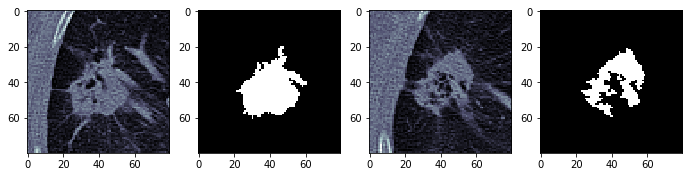

In [7]:
patient, pred = next(false_benign)

%clear

num_slice = len(patient)
quo, res = divmod(num_slice * 2, 8)

plt.rcParams['figure.figsize'] = (24, 4 * (quo + 1))

print('pn : %d\t pred : %s' % (patient[0]['patient_index'], str(pred)))
for idx, slice in enumerate(patient):
    plt.subplot(quo + 1, 8, 2 * idx + 1)
    plt.imshow(slice['roi'].reshape(80,80), plt.cm.bone)
    plt.subplot(quo + 1, 8, 2 * idx + 2)
    plt.imshow(slice['mask'].reshape(80,80), plt.cm.bone)
    
plt.show()

In [140]:
np.hstack([np.array([1,2,3]), np.array([3,2,1]), np.array([5,4,43])])

array([ 1,  2,  3,  3,  2,  1,  5,  4, 43])

In [141]:
li = [1,2,3,4]

In [148]:
np.random.shuffle(li)